In [2]:
import math
from scipy.stats import norm
import matplotlib.pyplot as plt
import numpy as np
import random

In [26]:
# Evaluate the decision limit formula
def decision_limit_fn(formula, n):
    try:
        return eval(formula.replace("n", str(n)))
    except Exception as e:
        raise ValueError(f"Error evaluating decision-limit formula: {e}")
output_list = []
# Main simulation function
def simulate(bias=0.,n=1000000,p_limit=0.05):
    
    decision_limit_formula = "n / (n + 10000)"
    
    boundary = 0
    portion = {0: 1}
    decided = 0
    prob_increase = (1 + bias) / (2 + bias)
    finished = 0
    fix_ratio = 1  # Hack for roundoff error

    for j in range(1, n + 1):
        old_portion = portion
        portion = {}
        total_running = 0

        # Update portion values
        for i in range(-boundary, boundary + 1, 2):
            old_portion[i] *= fix_ratio
            total_running += old_portion[i]

            portion[i - 1] = portion.get(i - 1, 0) + (1 - prob_increase) * old_portion[i]
            portion[i + 1] = portion.get(i + 1, 0) + prob_increase * old_portion[i]

        fix_ratio = (1 - finished) / total_running

        boundary += 1
        allowed_decisions = decision_limit_fn(decision_limit_formula, j) * p_limit
        this_decision = 0

        if bias >= 0:
            this_decision += portion.get(-boundary, 0)
        if bias <= 0:
            this_decision += portion.get(boundary, 0)

        if this_decision + decided <= allowed_decisions:
            decided += this_decision
            finished += portion.pop(boundary, 0)
            finished += portion.pop(-boundary, 0)
            standard_deviations = boundary / math.sqrt(j)
            p_value = 2 * norm.sf(standard_deviations)

            #print(f"{j}\t{boundary}\t{finished}\t{standard_deviations:.6f}\t{p_value:.6f}")
            output_list.append([j, boundary, finished,standard_deviations,p_value])
            boundary -= 2
            if boundary < 0:
                break
simulate(0,10000)

In [27]:
output_arr = np.array(output_list)

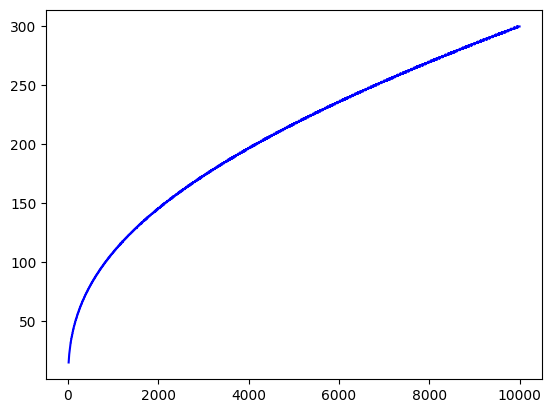

In [32]:
plt.figure()
plt.plot(output_arr[:,0], output_arr[:,1], 'b')
plt.show()

In [107]:
pC = 0.2
#pB = random.random()
pT = 0.3
N = 8000

In [110]:
sumC = 0
sumT = 0
#threshold = 2.25*np.sqrt(N)
threshold = 2.*np.sqrt(N)
print(threshold)
for i in range(N//2):
    rC = random.random()
    rT = random.random()

    # Successful conversions
    if rC < pC:
        sumC += 1
    elif rT < pT:
        sumT += 1
    
    # Check to see if we should quit the loop    
    if sumT - sumC > threshold:
        print(f'Treatment won at {i}')
        break
    #elif sumB - sumR > threshold:
    #    print(f'Blue won at {i}')
    #    break
    elif sumT + sumC >= N:
        print(f'No winner at {i}')
        break
    
    # If we made it all the way to the end
    if i == N//2 -1:
        print(f'No winner at {N//2}')
print(sumC)
print(sumT)
print(sumT - sumC)

178.88543819998318
No winner at 4000
842
937
95
